In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA.csv', DATA))
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,vcc,mfri,⋯,Tmin,winterMin,summerTmean,Pmean,summerP1,minT,JanMin,TOctSep,Jan20,PcumOctSep
-124.1712,40.22942,365.1772,0.80,1,1,25.50000,58050.83,1,2,⋯,3.799283,-1.050936,13.39157,147.6052,24.63396,-1.142272,0.77218069,10.28896,0,3588.627
-124.0860,40.42007,493.0852,0.80,0,1,42.46217,52809.04,1,2,⋯,3.858750,-1.872970,14.15700,136.2772,25.59386,-1.986082,-0.02538966,10.65948,0,3310.186
-123.9379,40.25447,487.5240,0.80,1,1,169.82977,54385.98,1,2,⋯,3.853568,-2.322706,15.26891,131.7037,22.97331,-2.402099,-0.42077545,11.30121,0,3203.155
-123.9535,40.34353,350.6961,0.80,0,1,249.11995,47005.25,1,2,⋯,4.731104,-2.289419,15.96638,127.5623,21.96572,-2.376570,-0.38369531,12.05334,0,3101.846
-124.2945,42.21193,387.5008,2.10,1,1,102.39621,51167.16,3,2,⋯,3.569939,-1.609584,14.75741,144.9382,63.31930,-1.701227,0.26865842,10.65064,0,3508.975
-124.3114,42.30082,409.5534,331.05,1,1,83.12288,54697.57,3,2,⋯,2.772311,-1.861916,14.02822,145.8606,65.28476,-1.954968,0.04758294,9.89128,0,3531.298


In [28]:
cor.test(data$mStdAge, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$mStdAge and log(data$beetleAcres)
t = 7.8637, df = 7634, p-value = 4.241e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06734481 0.11184436
sample estimates:
       cor 
0.08963932 


In [31]:
cor.test(data$density, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$density and log(data$beetleAcres)
t = 8.1751, df = 7634, p-value = 3.434e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07087692 0.11534762
sample estimates:
       cor 
0.09315873 


In [3]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep),
    data=data) # GCV = 2.3865
proc.time() - ptm

   user  system elapsed 
 21.004   0.872  29.282 

In [4]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(vcc) + te(mfri) + te(prs) + 
    te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + 
    te(maxAugT) + te(summerP0) + te(Tmean) + te(mi) + te(Tvar) + 
    te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + te(AugTmax) + 
    te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + 
    te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + 
    te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + 
    te(Jan20) + te(PcumOctSep)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.98043    0.09378  42.446  < 2e-16 ***
host         0.32890    0.08831   3.724 0.000197 ***
forest       0.14679    0.04057   3.618 0.000299 ***
GAP1        -0.19059    0.06431  -2.963 0.003052 ** 

In [5]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep')

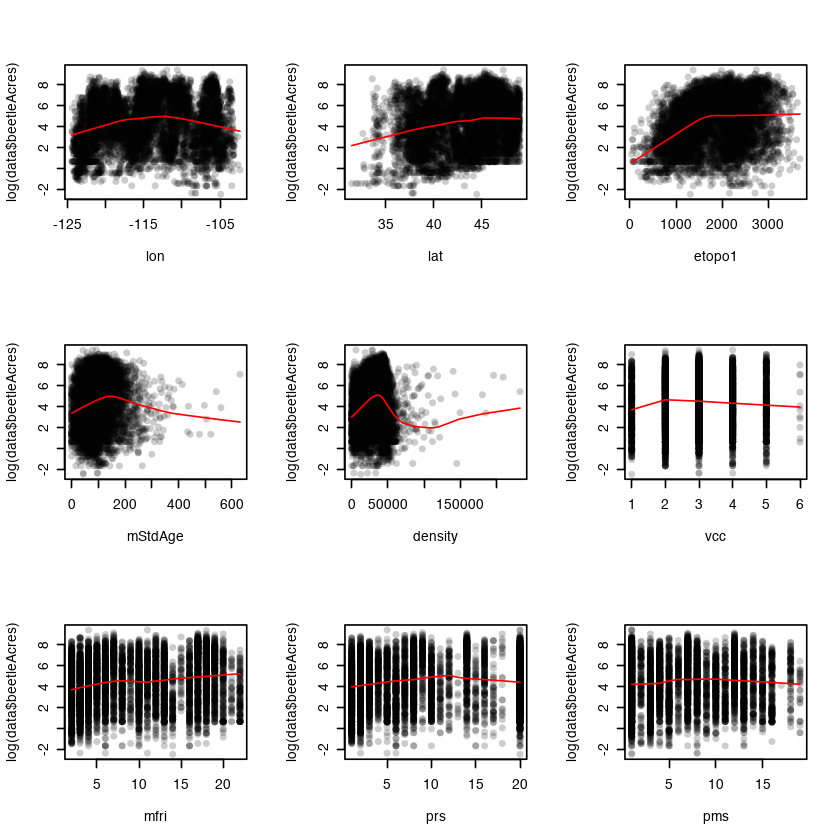

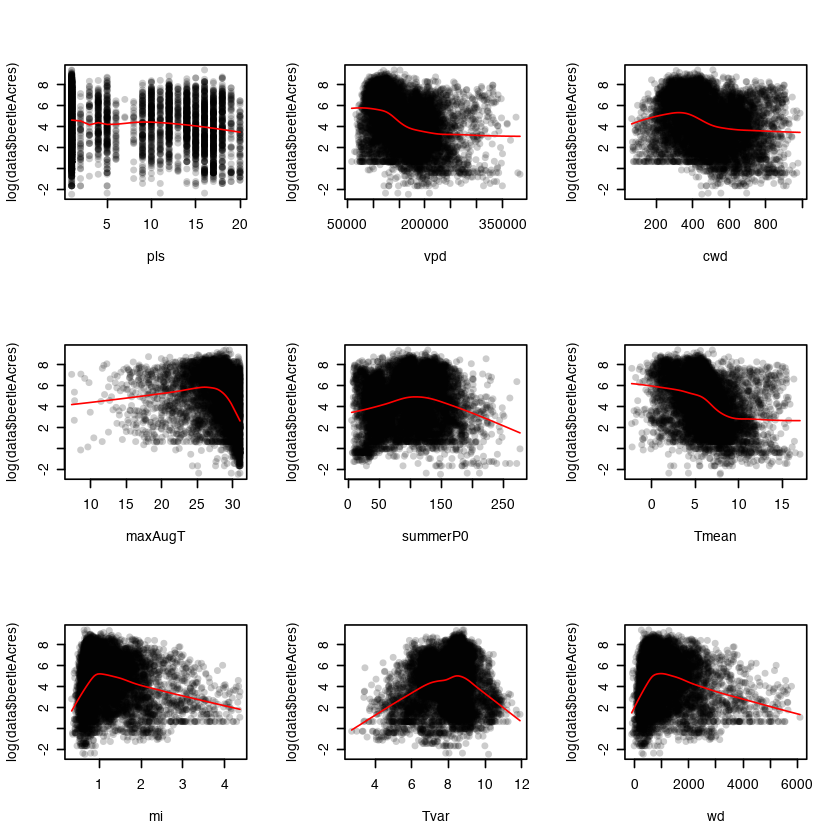

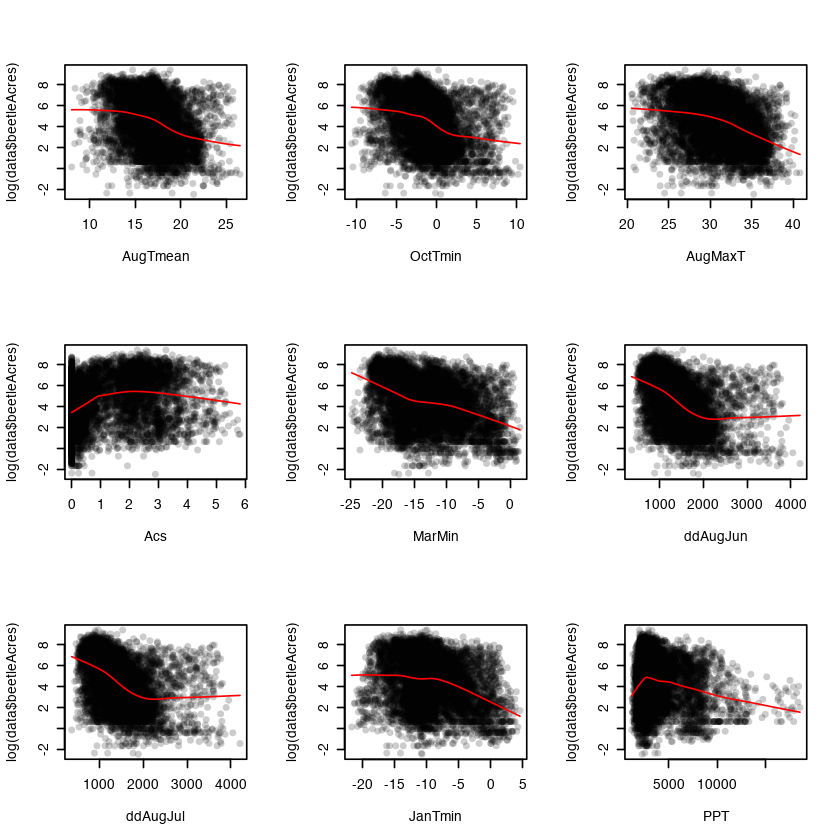

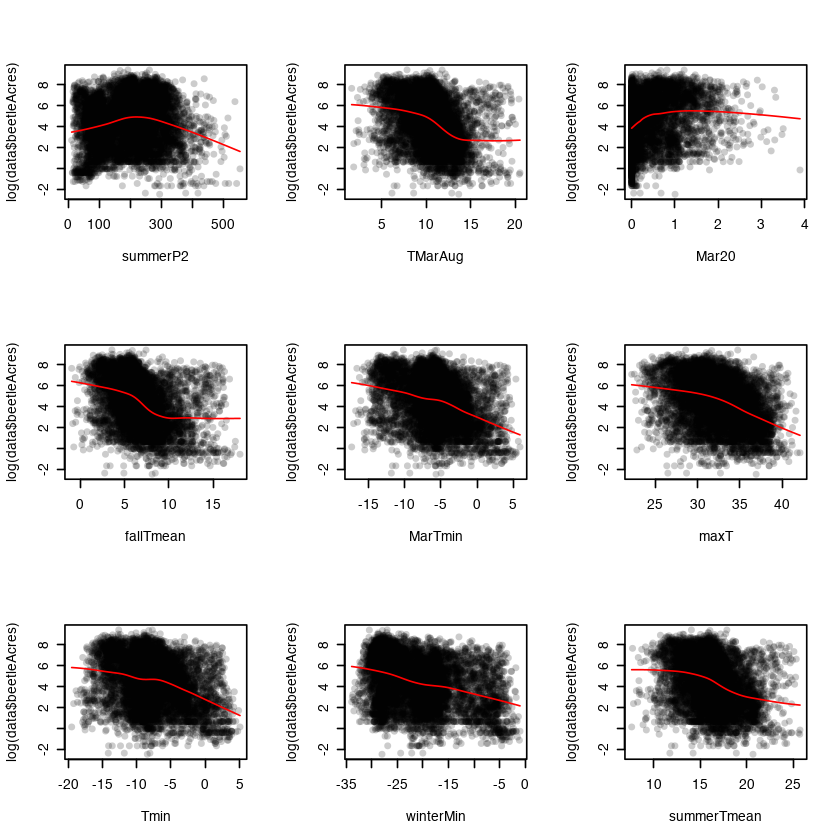

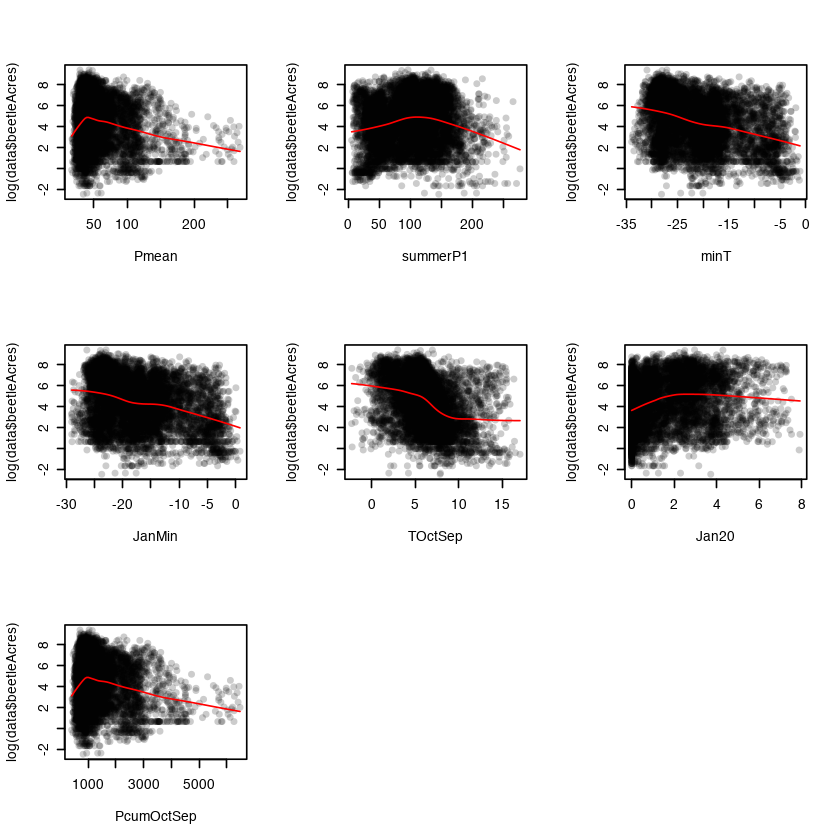

In [6]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [7]:
mod <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2),
    data=data)

In [8]:
mod.r <- step(mod, trace=0)

In [9]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2) + AugTmax + 
    Acs + I(Acs^2) + MarMin + ddAugJun + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + JanMin + I(JanMin^2) + TOctSep + Jan20 + 
    I(Jan20^2) + PcumOctSep + I(PcumOctSep^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3227 -1.0371  0.1295  1.1275  7.8009 

Coefficients:
          

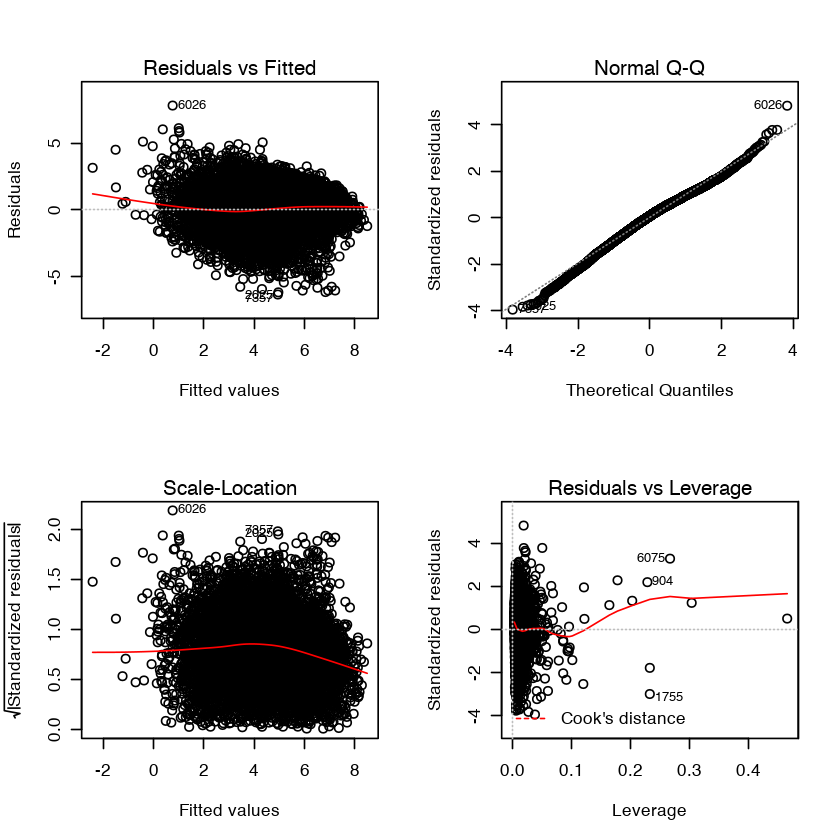

In [10]:
par(mfrow=c(2, 2))
plot(mod.r)

In [11]:
data$preds <- mod.r$fitted

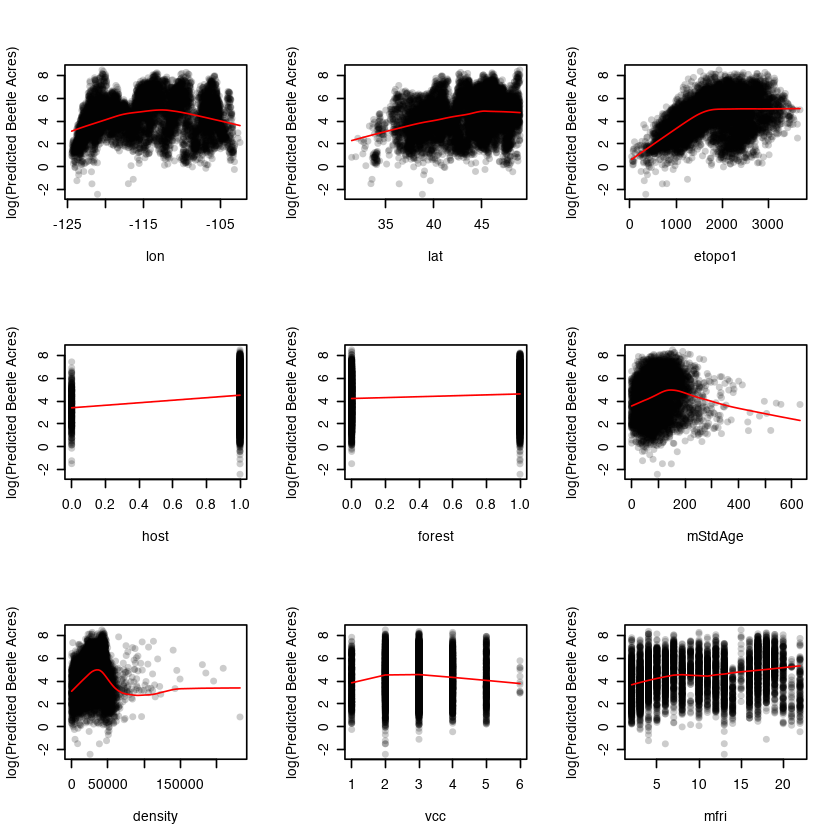

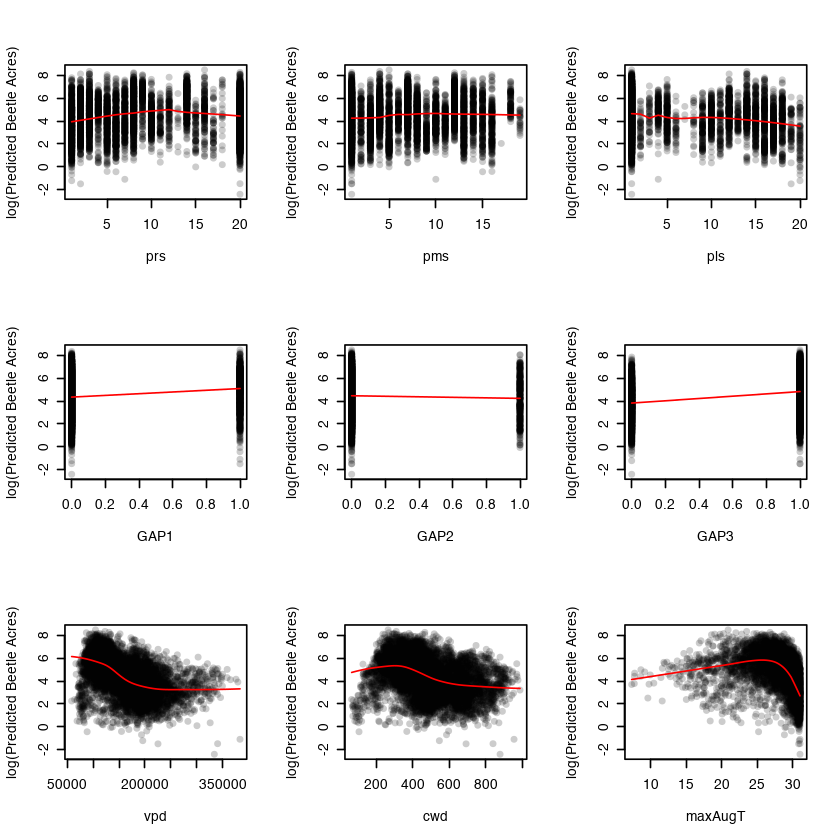

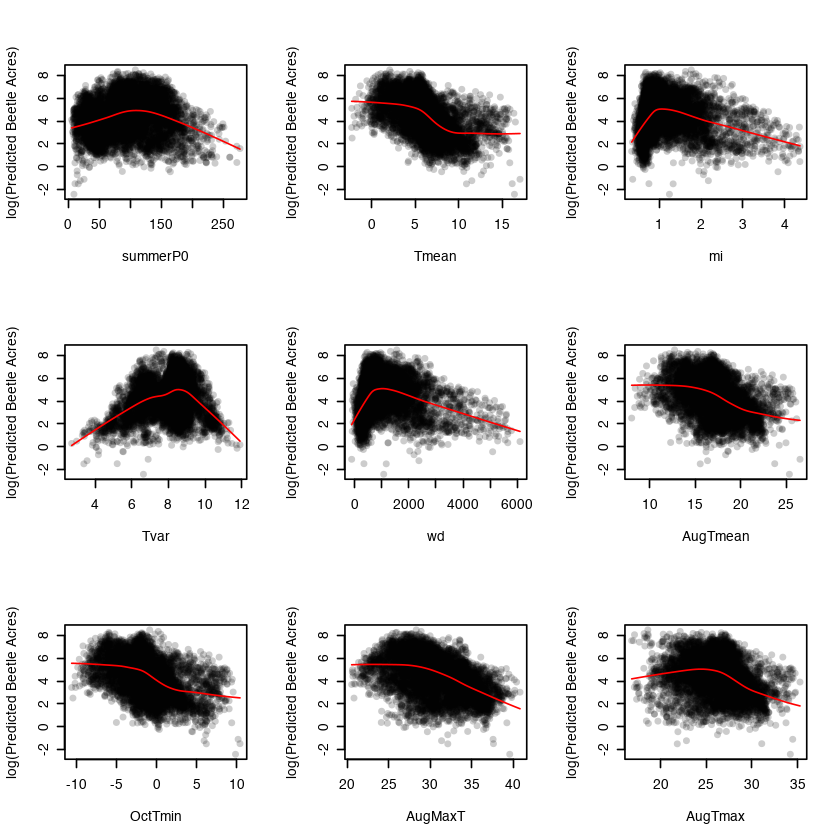

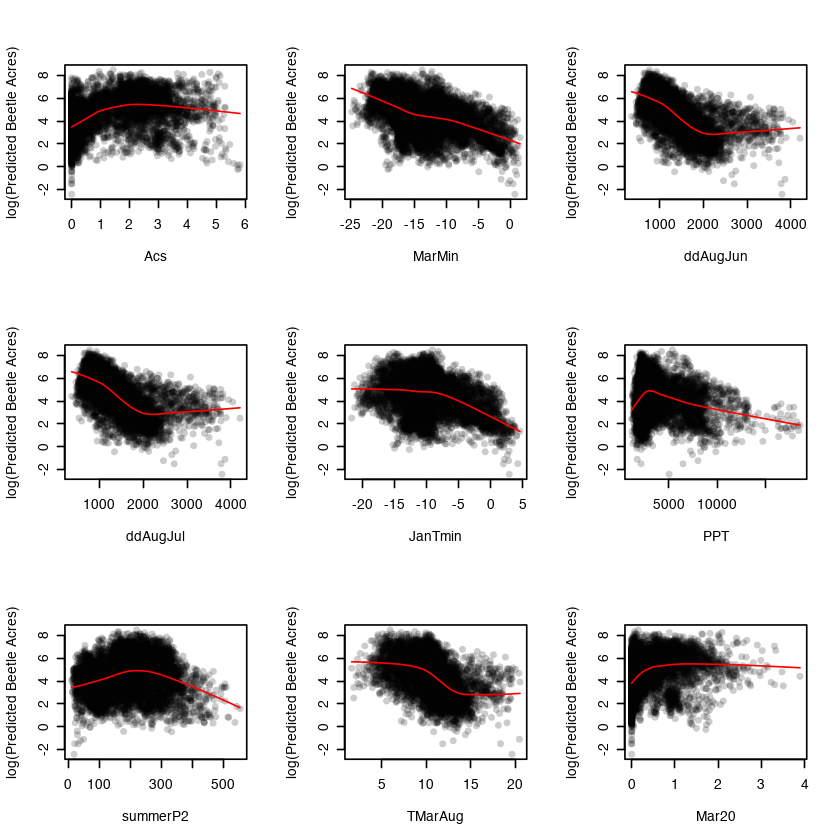

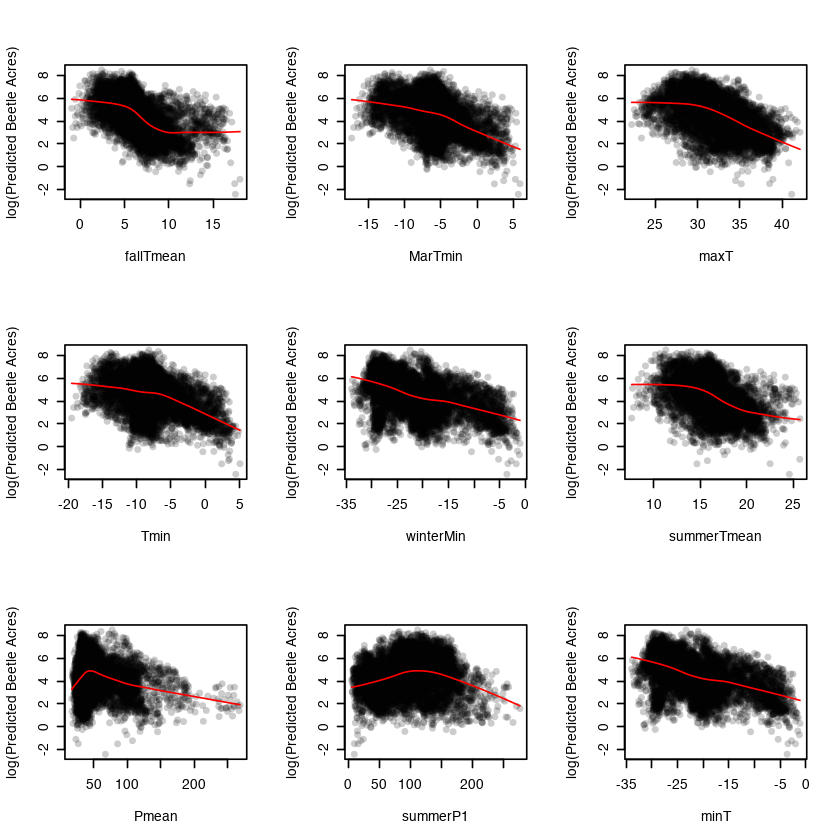

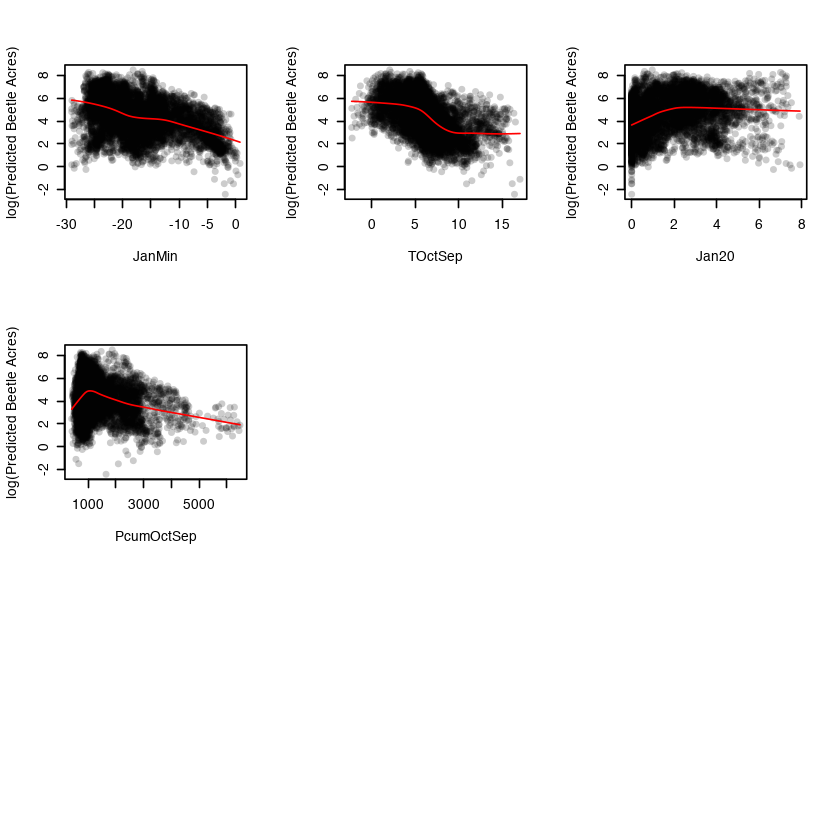

In [12]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (!(field %in% c('beetleAcres', 'preds'))) {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [13]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

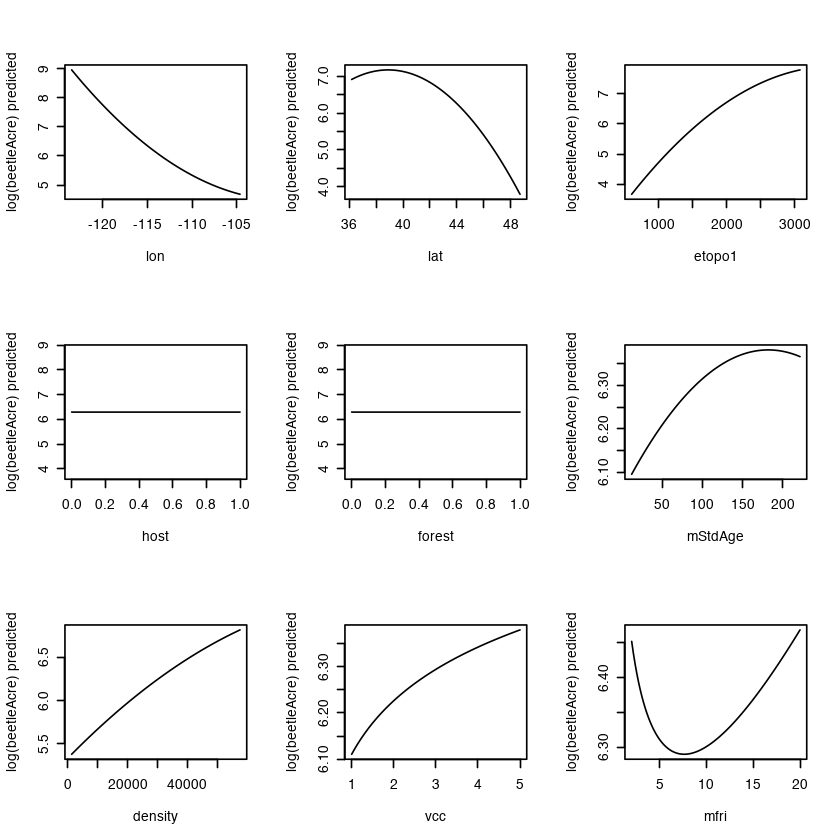

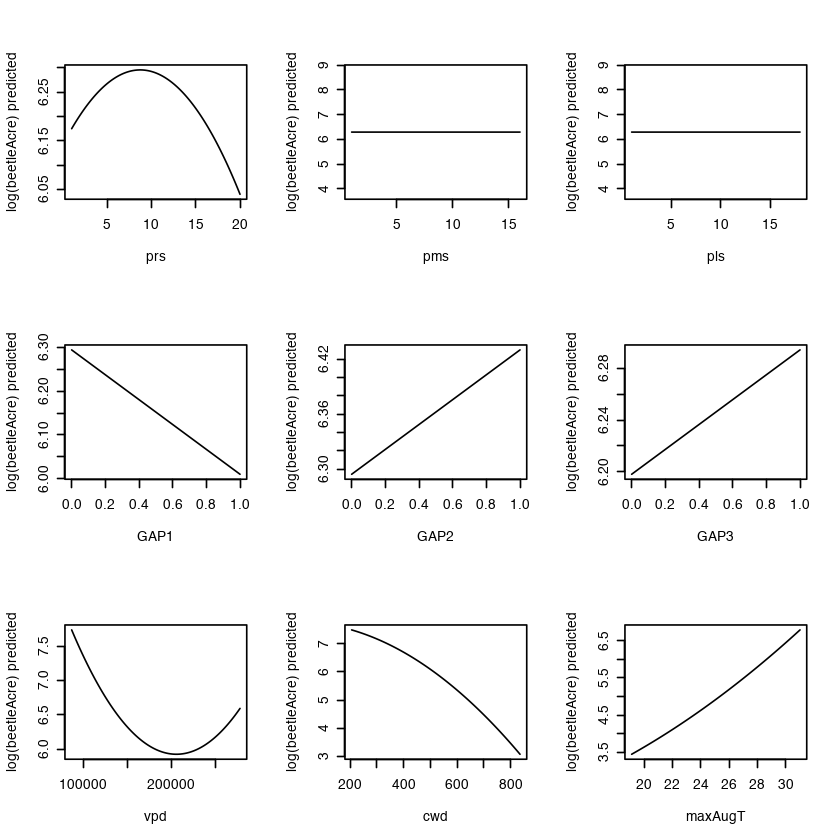

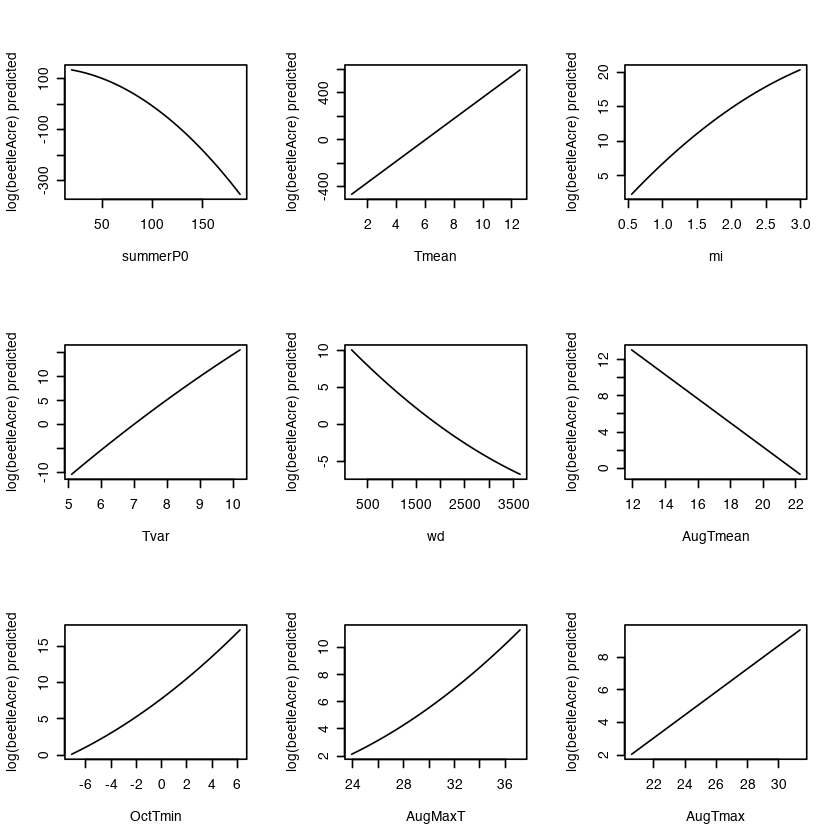

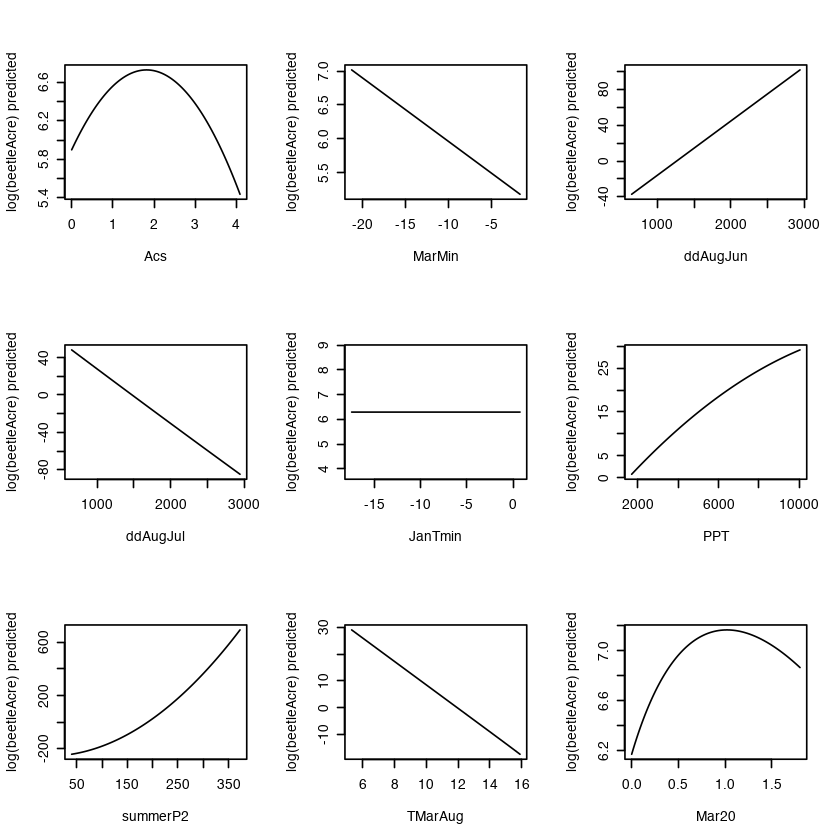

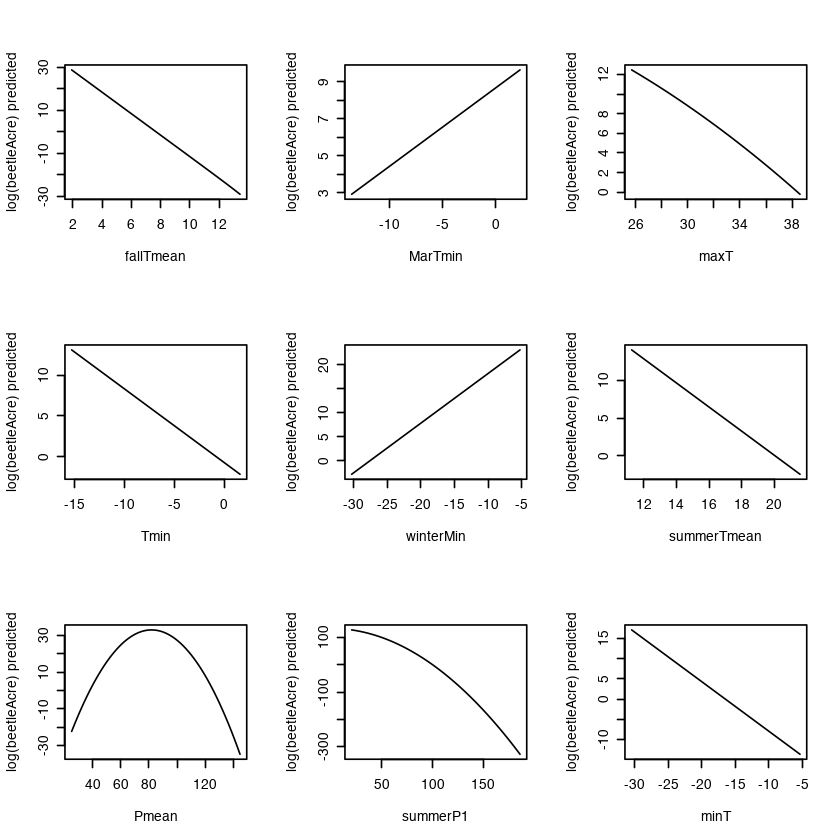

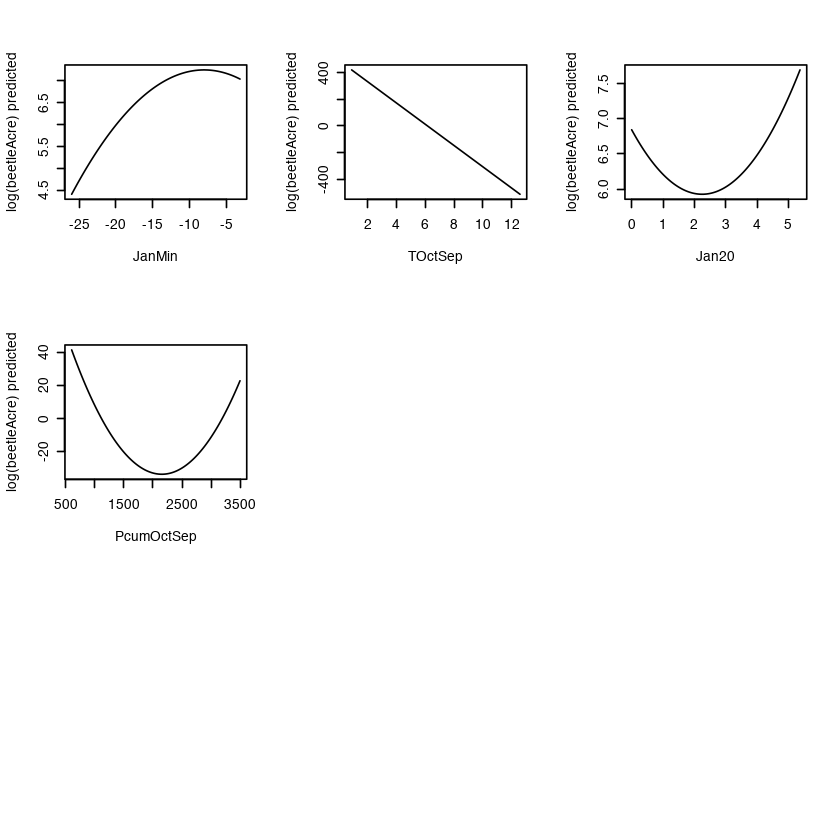

In [14]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

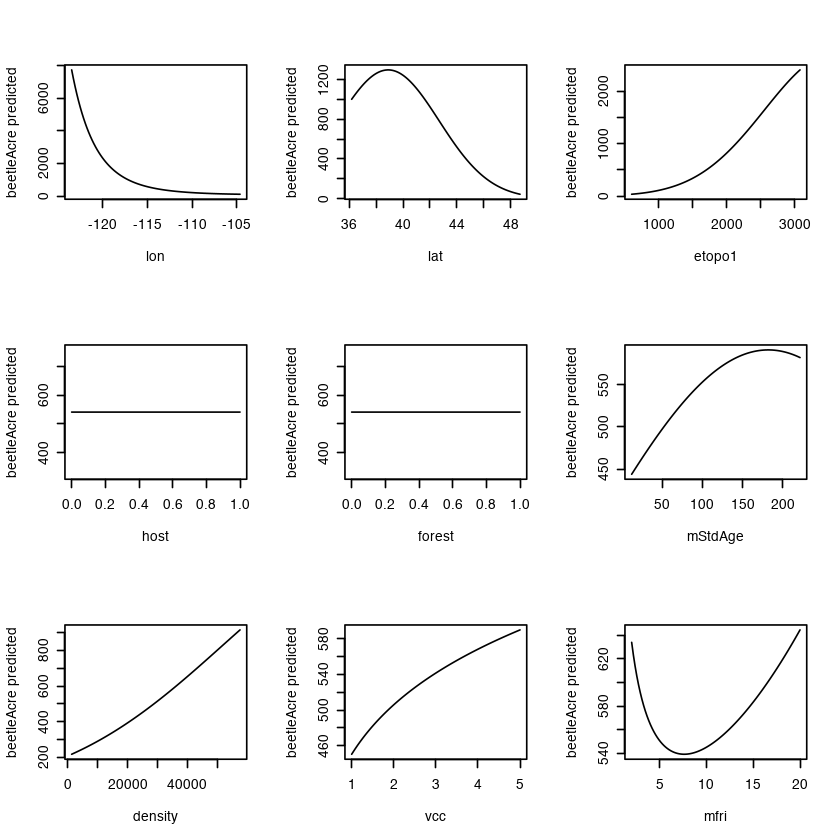

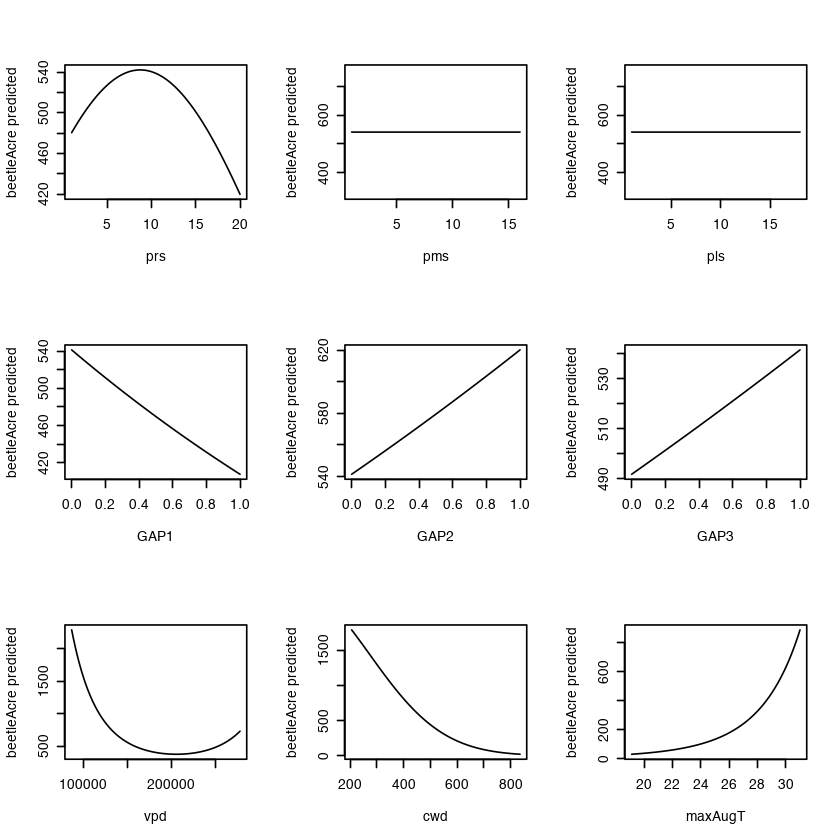

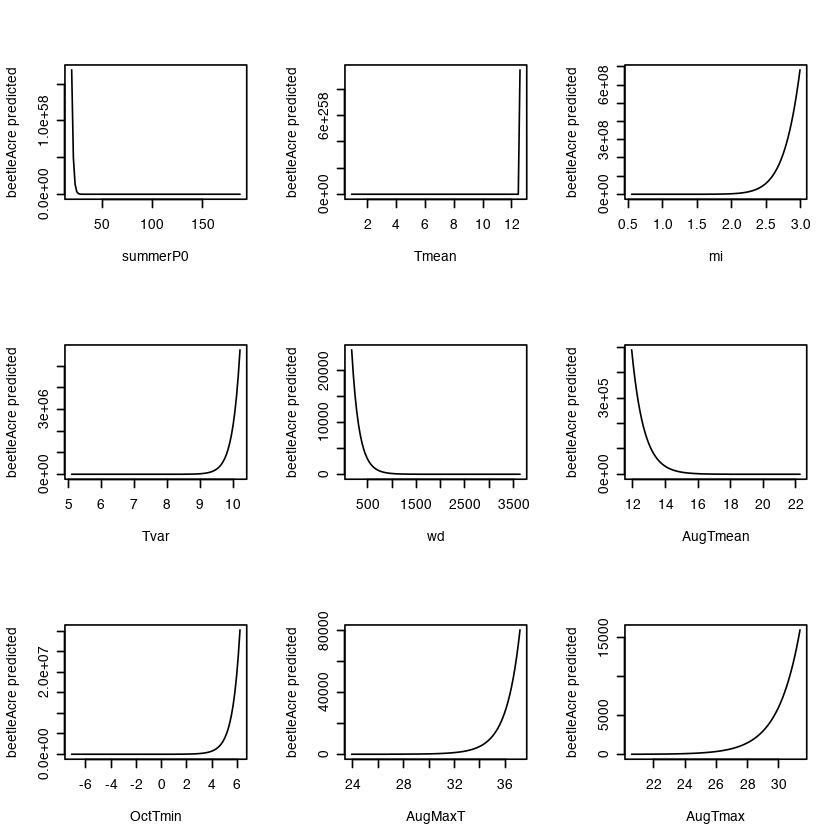

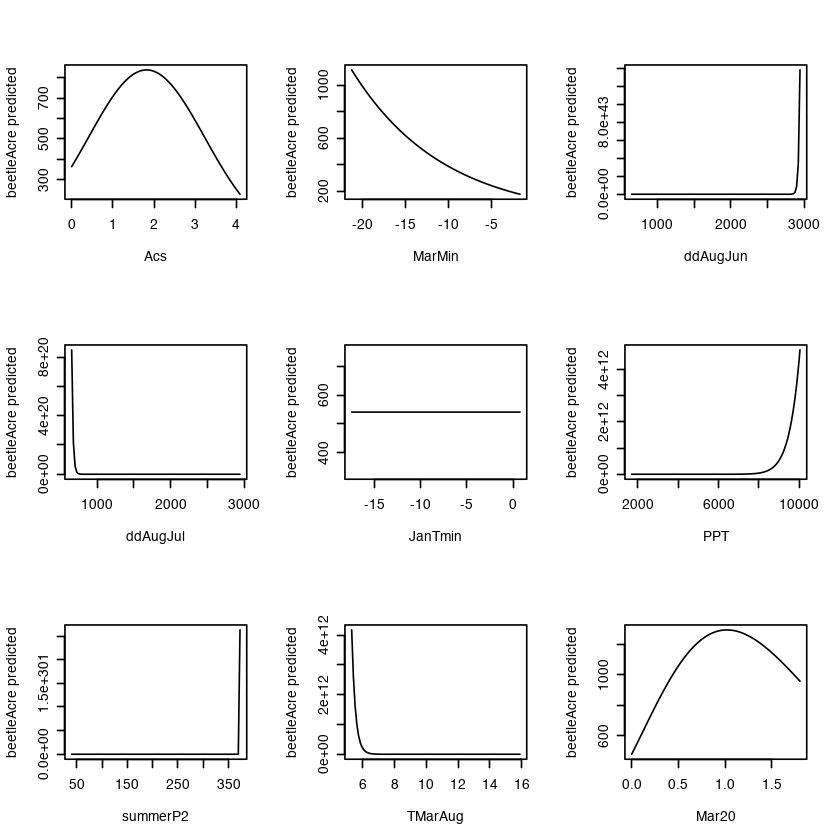

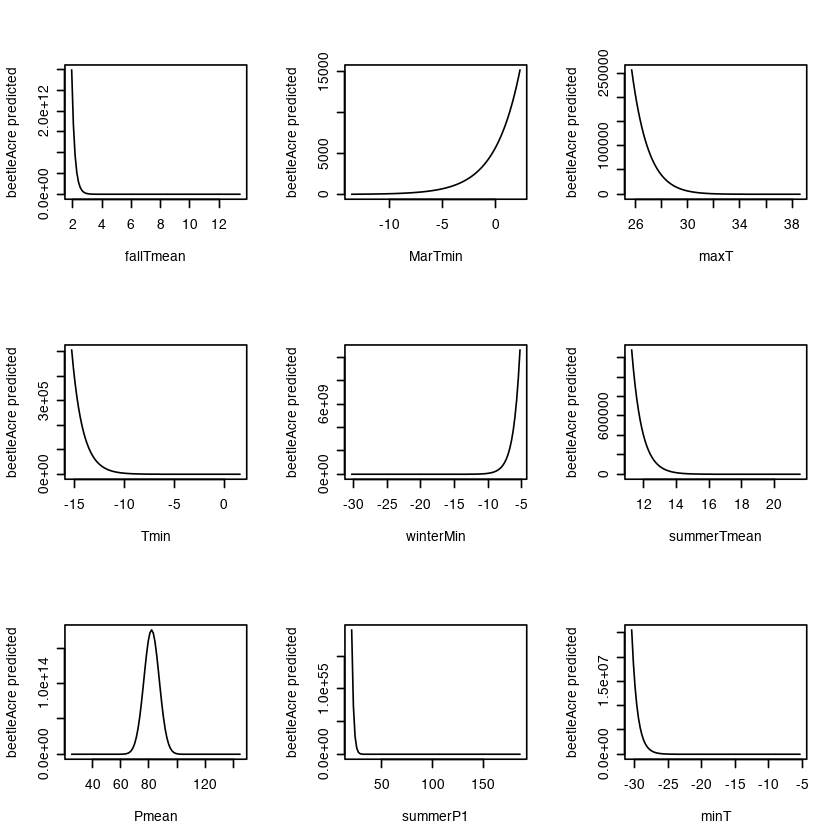

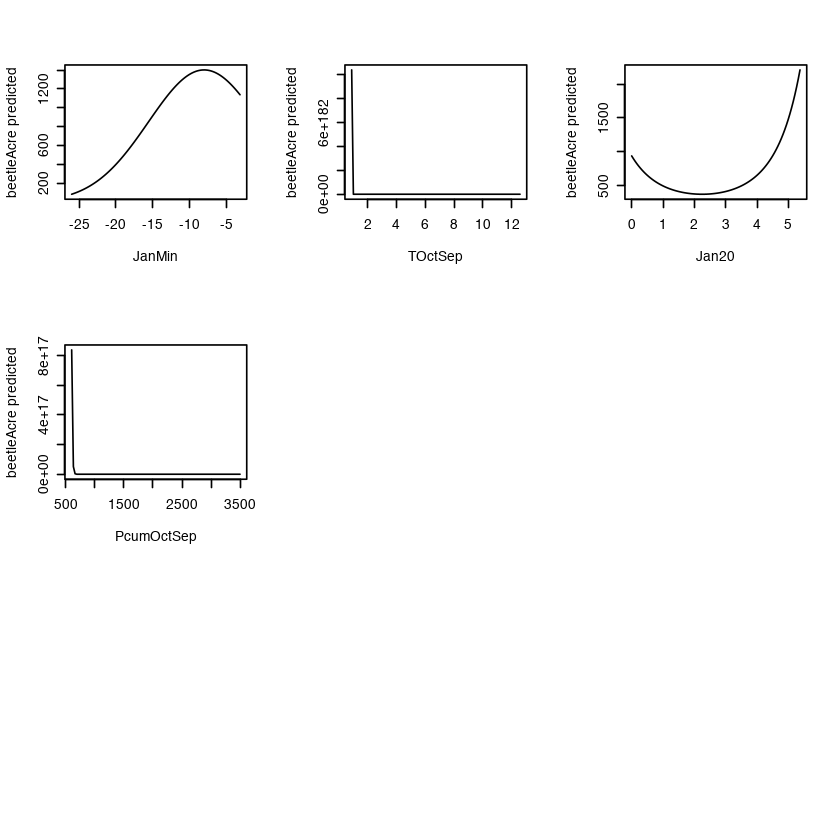

In [15]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod.r, newdata=test.df))
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}

In [17]:
sq_terms <- c('lat', 'density', 'mStdAge', 'density', 'prs', 'vpd', 'cwd', 'maxAugT', 'summerP0', 
              'Tmean', 'mi','Tvar', 'wd', 'OctTmin', 'AugMaxT', 'Acs', 'ddAugJul', 
              'PPT', 'summerP2', 'maxT', 'Pmean', 'summerP1', 'JanMin', 'Jan20', 'PcumOctSep')
exp_terms <- c('Tmean', 'TMarAug', 'fallTmean')
logp1_terms <- 'Mar20'

for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data[,varnm] <- (data[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data[,varnm] <- exp(data[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

for(var in logp1_terms){
    varnm <- paste0(var, '_logp1')
    data[,varnm] <- log(data[,var]+1)
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

Calculated lat in a squared term...
Calculated density in a squared term...
Calculated mStdAge in a squared term...
Calculated density in a squared term...
Calculated prs in a squared term...
Calculated vpd in a squared term...
Calculated cwd in a squared term...
Calculated maxAugT in a squared term...
Calculated summerP0 in a squared term...
Calculated Tmean in a squared term...
Calculated mi in a squared term...
Calculated Tvar in a squared term...
Calculated wd in a squared term...
Calculated OctTmin in a squared term...
Calculated AugMaxT in a squared term...
Calculated Acs in a squared term...
Calculated ddAugJul in a squared term...
Calculated PPT in a squared term...
Calculated summerP2 in a squared term...
Calculated maxT in a squared term...
Calculated Pmean in a squared term...
Calculated summerP1 in a squared term...
Calculated JanMin in a squared term...
Calculated Jan20 in a squared term...
Calculated PcumOctSep in a squared term...
Calculated Tmean in a exponential term..

In [18]:
selected.vars <- c('lon', 'lat', 'etopo1', 'mStdAge', 'density', 'mfri', 'prs', 'GAP1', 'GAP3',
                   'vpd', 'summerP0', 'Tmean', 'mi', 'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'AugTmax', 
                   'Acs', 'MarMin', 'dAugJun', 'ddAugJul', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
                   'MarTmin', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'minT', 'JanMin', 'TOctSep', 'Jan20', 
                   'PcumOctSep', paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'), paste0(logp1_terms, '_logp1'))
predictors <- data[ , (names(data) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- log(df$beetleAcres)

In [19]:
mod <- lm(beetleAcres ~ ., data=df)

In [20]:
mod.r <- step(mod, trace=0)

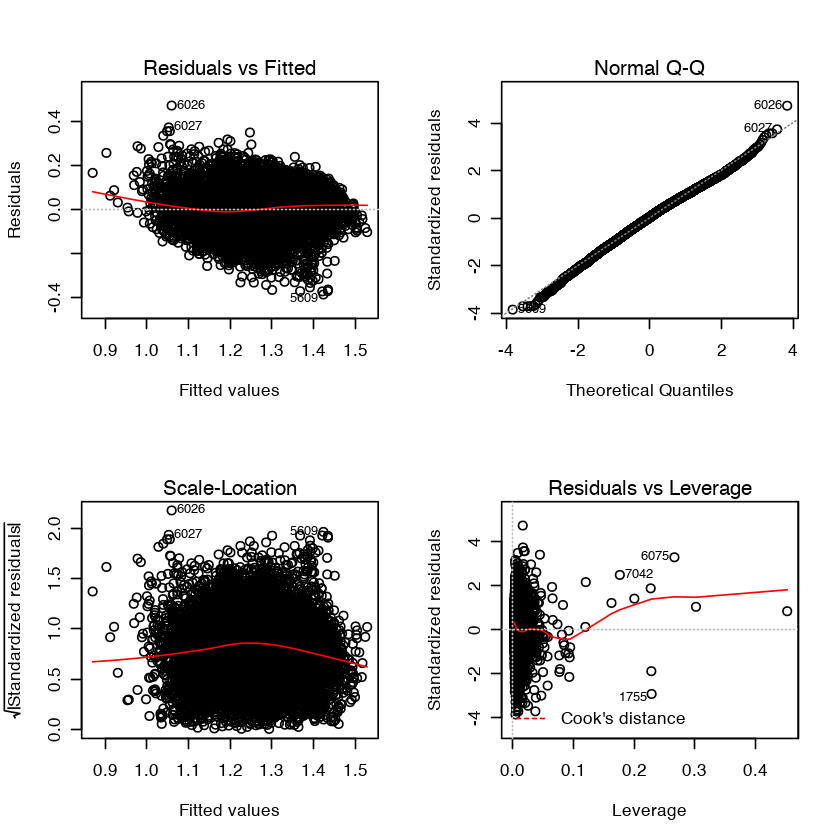

In [26]:
par(mfrow=c(2, 2))
plot(mod.r)

In [21]:
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    GAP1 + GAP3 + vpd + summerP0 + Tmean + mi + Tvar + wd + AugTmean + 
    OctTmin + AugTmax + Acs + MarMin + ddAugJul + PPT + summerP2 + 
    TMarAug + Mar20 + fallTmean + MarTmin + Tmin + winterMin + 
    summerTmean + Pmean + minT + TOctSep + Jan20 + PcumOctSep + 
    lat_sq + density_sq + mStdAge_sq + prs_sq + vpd_sq + cwd_sq + 
    maxAugT_sq + summerP0_sq + Tmean_sq + mi_sq + Tvar_sq + wd_sq + 
    OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJul_sq + PPT_sq + 
    summerP2_sq + maxT_sq + Pmean_sq + summerP1_sq + JanMin_sq + 
    Jan20_sq + PcumOctSep_sq + Tmean_exp + TMarAug_exp + fallTmean_exp + 
    Mar20_logp1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4376 -1.0373  0.1247  1.1351  7.4126 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.41981    0.01877 235.437  < 2e-16 ***
lon             -1.18161    0.14617  -8.084 7.26e-16 ***
lat     

In [23]:
sort(abs(mod.r$coefficients))

GAP3        prs_sq          GAP1    mStdAge_sq       mStdAge 
   0.04849948    0.08510678    0.10920894    0.18027270    0.20849309 
  TMarAug_exp    density_sq    OctTmin_sq   ddAugJul_sq       density 
   0.27191396    0.28438418    0.45753812    0.59346812    0.63530217 
fallTmean_exp      ddAugJul     Tmean_exp        MarMin    maxAugT_sq 
   0.64600436    0.66514006    0.76341329    0.83743962    0.90591492 
     Tmean_sq        etopo1        cwd_sq           lon        Acs_sq 
   1.00355634    1.04108609    1.11541645    1.18161122    1.21635624 
          Acs         Jan20         Mar20      Jan20_sq       AugTmax 
   1.23157331    1.26753827    1.48966523    1.52763399    1.54440551 
  Mar20_logp1     JanMin_sq       MarTmin         wd_sq       Tvar_sq 
   1.67334423    1.71830650    2.06290667    2.07096975    2.66993985 
       vpd_sq           vpd         mi_sq    AugMaxT_sq   summerTmean 
   2.90299472    3.20203043    3.22276216    3.31471299    3.44793225 
      OctTmin      AugTmean       maxT_sq        PPT_sq   (Intercept) 
   3.72593334    3.86684455    3.94877889    4.13962787    4.41981230 
         Tmin            wd     winterMin            mi      summerP2 
   4.49264267    6.58642003    7.01487957    8.20026502    8.67007532 
         minT      summerP0          Tvar           lat        lat_sq 
   8.87581053    9.08121450    9.52099354   10.80820813   11.74740209 
          PPT       TMarAug     fallTmean         Pmean      Pmean_sq 
  12.81177532   13.52188554   13.84636183   97.25676517  104.96713507 
PcumOctSep_sq    PcumOctSep   summerP0_sq   summerP1_sq       TOctSep 
 111.01646381  112.37093529  130.97080705  133.95665189  239.99655479 
  summerP2_sq         Tmean 
 264.93172447  273.67808714

In [24]:
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- (df$beetleAcres)^0.05
mod <- lm(beetleAcres ~ ., data=df)
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    prs + GAP1 + GAP3 + vpd + summerP0 + Tmean + mi + Tvar + 
    wd + AugTmean + OctTmin + AugMaxT + AugTmax + Acs + MarMin + 
    PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + 
    Tmin + winterMin + summerTmean + Pmean + minT + TOctSep + 
    Jan20 + PcumOctSep + lat_sq + density_sq + mStdAge_sq + prs_sq + 
    vpd_sq + cwd_sq + maxAugT_sq + summerP0_sq + Tmean_sq + mi_sq + 
    Tvar_sq + wd_sq + OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJul_sq + 
    summerP2_sq + maxT_sq + Pmean_sq + summerP1_sq + JanMin_sq + 
    Jan20_sq + PcumOctSep_sq + Tmean_exp + TMarAug_exp + fallTmean_exp + 
    Mar20_logp1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38845 -0.06619  0.00445  0.07017  0.47437 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     1.255548   0.001156 1086.366  < 2e-16 ***
lon            -0.071907   0.008596   -8.365  < 2e-16 ***

In [25]:
sort(abs(mod.r$coefficients))

GAP3          GAP1           prs    mStdAge_sq       mStdAge 
  0.002941689   0.007303909   0.009803241   0.011229482   0.012839441 
       prs_sq   TMarAug_exp    density_sq    OctTmin_sq fallTmean_exp 
  0.014471580   0.017211041   0.017960880   0.028863003   0.038811603 
      density     Tmean_exp        MarMin    maxAugT_sq      Tmean_sq 
  0.040050710   0.045835708   0.047176520   0.052883531   0.059208334 
  ddAugJul_sq        etopo1        cwd_sq           lon       AugMaxT 
  0.061143534   0.064577359   0.067283706   0.071906659   0.077938868 
       Acs_sq           Acs         Jan20         Mar20       AugTmax 
  0.079083966   0.081084667   0.089663432   0.098191958   0.098504014 
     Jan20_sq     JanMin_sq       MarTmin   Mar20_logp1         wd_sq 
  0.100317642   0.100915521   0.111068442   0.114014538   0.131414798 
   AugMaxT_sq       Tvar_sq        vpd_sq           vpd   summerTmean 
  0.134298683   0.147027336   0.170586028   0.188196946   0.197136730 
        mi_sq       maxT_sq       OctTmin      AugTmean          Tmin 
  0.204823859   0.238904631   0.239658918   0.248642408   0.262159079 
           wd     winterMin            mi          Tvar      summerP2 
  0.400432588   0.483278309   0.500252708   0.556968606   0.567360458 
         minT      summerP0           PPT           lat        lat_sq 
  0.588932852   0.594154817   0.600107072   0.648505393   0.712559009 
      TMarAug     fallTmean   (Intercept)         Pmean      Pmean_sq 
  0.796435392   0.857343362   1.255548117   5.605932041   5.714143157 
PcumOctSep_sq    PcumOctSep   summerP0_sq   summerP1_sq       TOctSep 
  5.831526973   6.349914016  10.405651718  10.601396787  14.726197008 
        Tmean   summerP2_sq 
 16.751142919  21.005696317

In [27]:
write.csv(df, sprintf('%s/mpb10km_data_wo_FIA_scaled.csv', DATA), row.names=FALSE)